# This notebook is for prediction only
# [You can also look at the EDA Notebook of mine](https://www.kaggle.com/meetnagadia/titanic-spaceship-eda-xgboost-0-75-score/edit/run/89212368)

**Exclusive image** 

## Lets see the destination planet of the passengers in titanic Spaceship

Image of TRAPPIST-1e
![](https://ourplnt.com/wp-content/uploads/2018/05/TRAPPIST-1e-artist-conception.jpg)

Image of 55 Canri e
![](https://i.pinimg.com/originals/72/3a/ff/723affe8f588f9ba78fa6832f6fa9a41.jpg)

Image of PSO_J318.5
![](https://upload.wikimedia.org/wikipedia/commons/e/e2/PSO_J318.5-22_image_from_the_Pan-STARRS1_telescope.png)

# Lets start with the prediction part

In [1]:
# Importing all the necessary library

import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# Loading our training data as train_df and testing data as test_df

train_df =pd.read_csv("../input/spaceship-titanic/train.csv") 
test_df = pd.read_csv("../input/spaceship-titanic/test.csv")

In [3]:
# checking for null values in training dataset

train_df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [4]:
# checking null values in testing dataset

test_df.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [5]:
# filling the null values with median 

imputer_cols = ["Age", "FoodCourt", "ShoppingMall", "Spa", "VRDeck" ,"RoomService"]
imputer = SimpleImputer(strategy="median" )
imputer.fit(train_df[imputer_cols])
train_df[imputer_cols] = imputer.transform(train_df[imputer_cols])
test_df[imputer_cols] = imputer.transform(test_df[imputer_cols])
train_df["HomePlanet"].fillna('Z', inplace=True)
test_df["HomePlanet"].fillna('Z', inplace=True)

In [6]:
# label encoding 

label_cols = ["HomePlanet", "CryoSleep","Cabin", "Destination" ,"VIP"]
def label_encoder(train,test,columns):
    for col in columns:
        train[col] = train[col].astype(str)
        test[col] = test[col].astype(str)
        train[col] = LabelEncoder().fit_transform(train[col])
        test[col] =  LabelEncoder().fit_transform(test[col])
    return train, test

train_df ,test_df = label_encoder(train_df,test_df ,label_cols)

In [7]:
cor = train_df.corr()
cor

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
HomePlanet,1.000000,0.068726,-0.425569,0.042618,0.122943,0.044255,0.192189,0.056321,0.088970,0.045252,0.035631,0.107755
CryoSleep,0.068726,1.000000,0.100689,-0.085571,-0.068816,-0.023407,-0.216689,-0.182029,-0.188532,-0.178382,-0.171721,0.404716
Cabin,-0.425569,0.100689,1.000000,0.113260,-0.236994,-0.053158,-0.073802,-0.260056,-0.067709,-0.180768,-0.210865,-0.052604
Destination,0.042618,-0.085571,0.113260,1.000000,-0.004342,-0.024905,0.043735,-0.109558,0.022982,-0.052915,-0.072850,-0.104817
Age,0.122943,-0.068816,-0.236994,-0.004342,1.000000,0.032434,0.068629,0.127390,0.033148,0.120946,0.099590,-0.074233
VIP,0.044255,-0.023407,-0.053158,-0.024905,0.032434,1.000000,0.038011,0.054756,-0.009496,0.020355,0.054623,-0.014260
RoomService,0.192189,-0.216689,-0.073802,0.043735,0.068629,0.038011,1.000000,-0.015126,0.052337,0.009244,-0.018624,-0.241124
FoodCourt,0.056321,-0.182029,-0.260056,-0.109558,0.127390,0.054756,-0.015126,1.000000,-0.013717,0.221468,0.224572,0.045583
ShoppingMall,0.088970,-0.188532,-0.067709,0.022982,0.033148,-0.009496,0.052337,-0.013717,1.000000,0.014542,-0.007849,0.009391
Spa,0.045252,-0.178382,-0.180768,-0.052915,0.120946,0.020355,0.009244,0.221468,0.014542,1.000000,0.147658,-0.218545


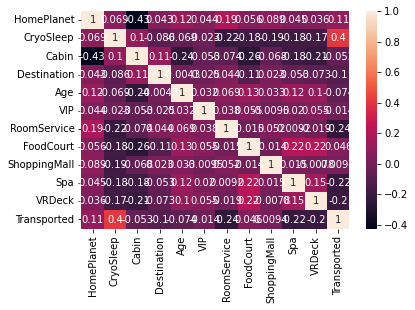

In [8]:
ax = sns.heatmap(train_df.corr(), annot=True)
plt.show()

In [9]:
# Droping the Transported column from X_train because its the label we are trying to predict
# Droping the Name column for X_train because its doest affect the outcome
# Droping the Namr column for X_test

X_train = train_df.drop(["Transported","Name"], axis =1 )
y_train = train_df["Transported"]
X_test = test_df.drop("Name",axis=1)

In [10]:
# Checking the datatypes of the Training dataset

X_train.dtypes

PassengerId      object
HomePlanet        int64
CryoSleep         int64
Cabin             int64
Destination       int64
Age             float64
VIP               int64
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
dtype: object

In [11]:
y_train.dtypes

dtype('bool')

In [12]:
# Checking the datatypes of the Testing dataset

X_test.dtypes

PassengerId      object
HomePlanet        int64
CryoSleep         int64
Cabin             int64
Destination       int64
Age             float64
VIP               int64
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
dtype: object

In [13]:
le = LabelEncoder()
X_train["PassengerId"] = le.fit_transform(X_train["PassengerId"])
X_test["PassengerId"]= le.fit_transform(X_test["PassengerId"])

In [14]:
X_train.dtypes

PassengerId       int64
HomePlanet        int64
CryoSleep         int64
Cabin             int64
Destination       int64
Age             float64
VIP               int64
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
dtype: object

# Building the Random Forest Model

In [15]:
# Building our Random Forest Model

clf = RandomForestClassifier(max_depth=10, random_state=42)

In [16]:
# Fitting the Model with training data

clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

# Prediction on Testing dataset

In [17]:
# Predicting the Test set results

y_pred = clf.predict(X_test)

In [18]:
y_pred

array([ True, False,  True, ...,  True,  True,  True])

# Submission:

In [19]:
# Since Passenger Id was transformed we need to inverse transform it for submission

X_test["PassengerId"]= le.inverse_transform(X_test["PassengerId"])

In [20]:
# Checking the datatype of the testing dataset

X_test.dtypes

PassengerId      object
HomePlanet        int64
CryoSleep         int64
Cabin             int64
Destination       int64
Age             float64
VIP               int64
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
dtype: object

In [21]:
# Creating a new dataframe for submission which will habe PassengerId and Transported Column

submission = pd.DataFrame(
    {'PassengerId':X_test["PassengerId"] ,
     'Transported': y_pred},columns=['PassengerId', 'Transported'])

In [22]:
# Saving our Submisson File

submission.to_csv("submission.csv",index=False)

In [23]:
# Checking the dimension of our submission Compitetion requires submission file shape to be(4277,2)

submission.shape

(4277, 2)

If you found this notebook dont forget to 

![](https://c.tenor.com/eRCcgw7TVWoAAAAC/up-upvote.gif)